## Introduction to Stats in Python Studio

We are going to be working with this [dataset](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) from Kaggle.  No need to download, as it is included in the git repository you just cloned.
<br>

Heart Disease is the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.
<br>

Heart failure is a common event caused by heart disease and this dataset contains 12 features that can be used to predict mortality by heart failure. You are tasked to look at two particular variables and record your observations about their usefulness for predicting the probability of heart failure.
<br>

In section one, you will be asked to run some simple EDA and apply statistical terminology to describe each variable in more detail.  Section two will explore what the distribution of your variables looks like. Finally, in section three you will be asked to make some inferences about your variables and if you feel they are good indicators of predicting heart failure.
<br>

Answer the questions and record your observations in the space provided. Feel free to add more code blocks if you'd like.
<br>



In [58]:
# Import libries need with alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# Set style and font size
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

In [3]:
# Read in data to a dataframe
df=pd.read_csv('heart3.csv')

## Section 1: First look at the data:

Run some simple EDA and look at the data and your variables. Answer the following questions.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Which of our columns are catogorical data?
<BR>
     <font color="red">2   creatinine_phosphokinase<br>
     4   ejection_fraction<br>
     6   platelets<br>
     7   serum_creatinine<br>
     8   serum_sodium<br>
     11  time<br></font>
    
    <BR><BR>
Which of our columns are continuous?
<BR>
     <font color="red">0   age<br>
     1   anaemia<br>
     3   diabetes<br>
     5   high_blood_pressure<br>
     9   sex<br>
     10  smoking<br>
     12  DEATH_EVENT<br></font>
<BR><BR>

### Statistical interpretation of our data?
#### First Variable: <font color="red">smoking</font>
Mean, Min, Max, STD? Describe what this means.<br>
<font color="red">
This is categorical data coded as "Does the patient smoke? Yes = 1 and No = 0".<br>
mean = 0.32107 (32.107% of the patients in this study smoke.)<br>
min = 0 (Lowest value out of the two available, indicates "No, doesn't smoke.")<br>
max = 1 (Highest value out of the two available, indicates "Yes, smokes.")<br>
std = 0.46767 (Doesn't mean much when there are only two values available, standard deviation will always be close to 0.5 in such scenarios.)<br>
</font>

<br><br><br>


#### Second Variable: <font color="red">creatinine_phosphokinase</font>
Mean, Min, Max, STD? Describe what this means.<br>
Creatinine phosphokinase (CPK) levels (mcg/L). Note that normal range is 10 to 120 mcg/L.<br>
<font color="red">
mean = 581.839465<br>
min = 23.000000<br>
max = 7861.000000<br>
std = 970.287881<br>
</font>
<br><br><br>

What could the numbers in our categorical data tell us?
<font color="red">See above.</font>
<br><br><br>

Why might we want to keep our categorical data as 1's and 0's? Why may we want to use something like the code below to change it?
<font color="red">This is the standard coding convention for health research and health data, and is the format most compatible with EpiInfo, SPSS, and SAS. More importantly, it makes logistic regression analysis easier. CHANGING IT IS NOT ADVISED; DO NOT DO IT.</font>


In [33]:
#df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
#df['anaemia'] = df.anaemia.replace({1: "Yes", 0: "No"})
#df['diabetes'] = df.diabetes.replace({1: "Yes", 0: "No"})
#df['high_blood_pressure'] = df.high_blood_pressure.replace({1: "Yes", 0: "No"})
#df['smoking'] = df.smoking.replace({1: "Yes", 0: "No"})

#df['DEATH_EVENT'] = df.DEATH_EVENT.replace({1: "Died", 0: "Alive"})

## Section 2: Distribution of our data:

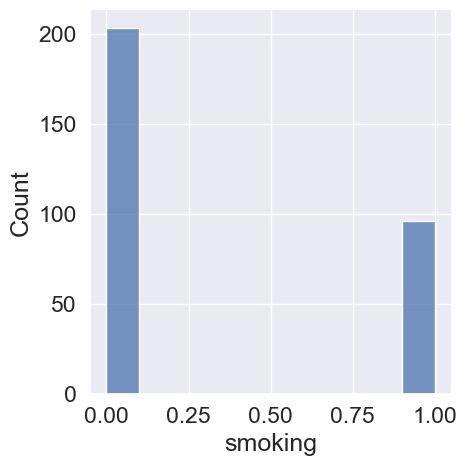

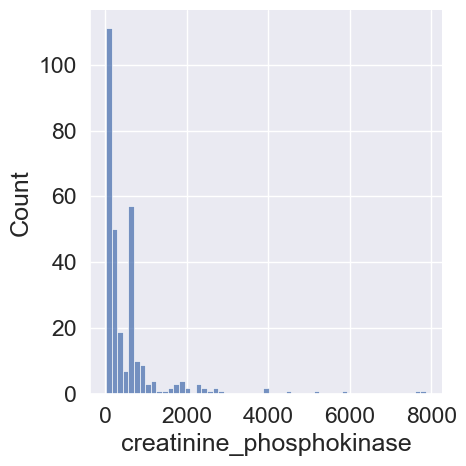

In [42]:
# Plot the distribution of your variable using distplot
sns.displot(data=df, x="smoking")
sns.displot(data=df, x="creatinine_phosphokinase")

<AxesSubplot:xlabel='creatinine_phosphokinase'>

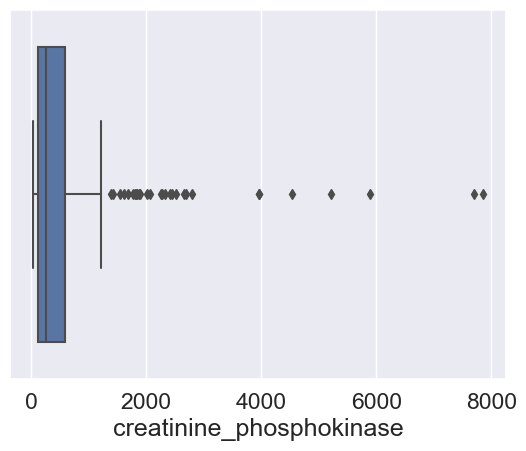

In [37]:
# Create boxplot to show distribution of variable
sns.boxplot(data=df, x="creatinine_phosphokinase")

In [ ]:
# Feel free to add any additional graphs that help you answer the questions below.

In [20]:
# Another way to check the skewness of our variable
print(df['smoking'].skew())
print(df['creatinine_phosphokinase'].skew())

0.770348815438949
4.463110084653752


In [21]:
# Another way to check the kurtosis of our variable
print(df['smoking'].kurtosis())
print(df['creatinine_phosphokinase'].kurtosis())

-1.4160799150023284
25.1490461965808


### Interpretation of how our data is distributed by variable?
Looking at the above graphs, what can you tell about the distribution of your variables?<br>
<font color="red">Most patients don't smoke.<br>
May patients have higher than recommended CPK levels, but some individuals have levels that are through the roof.</font><br><br><br><br>
What is the skewness and kurtosis of your variables.  What does this mean?<br>
<font color="red">For smoking, slight negative skew and slight negative kurtosis; there are more non-smokers than smokers and data is fairly spread out (two values).<br>
For CPK, significant positive skew and positive kurtosis; again, there are some individuals that have very high levels and data is concentrated in the more reasonable CPK levels.</font><br>
<br><br><br>
What are some of the differences you note looking at a categorical variable vs a continuous variable?
<font color="red">Not sure kurtosis is very useful for categorical variables. Neither is the box plot.<br><br><br><br><br>

## Section 3: Finding Correlations

Lets start by breaking our data into two.  

In [45]:
# splitting the dataframe into 2 parts
# on basis of ‘DEATH_EVENT’ column values
df_died = df[df['DEATH_EVENT'] == 1 ]
df_lived = df[df['DEATH_EVENT'] == 0 ]

[]

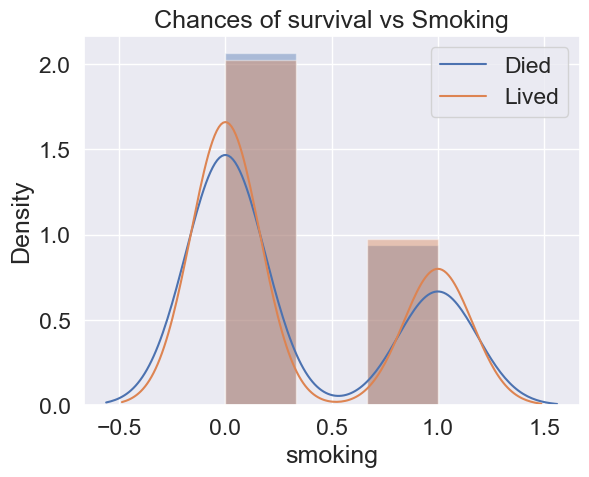

In [46]:
# Plot your variable based on if they died or lived

sns.distplot(df_died['smoking'])
sns.distplot(df_lived['smoking'])
plt.title("Chances of survival vs Smoking")
plt.legend(('Died','Lived'))
plt.plot()


[]

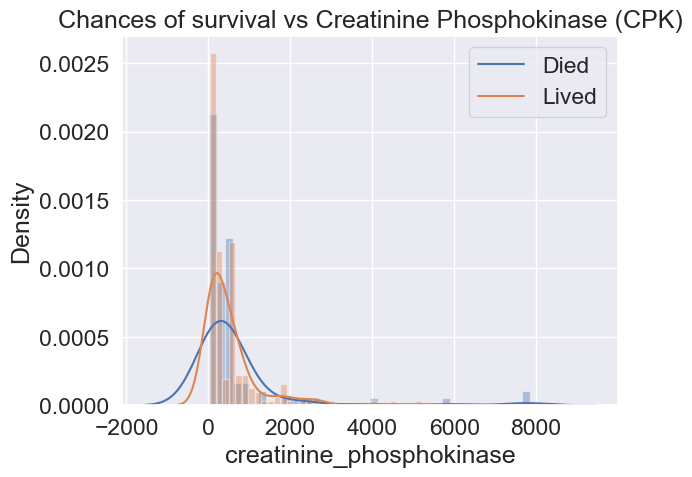

In [47]:
sns.distplot(df_died['creatinine_phosphokinase'])
sns.distplot(df_lived['creatinine_phosphokinase'])
plt.title("Chances of survival vs Creatinine Phosphokinase (CPK)")
plt.legend(('Died','Lived'))
plt.plot()

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='DEATH_EVENT'>

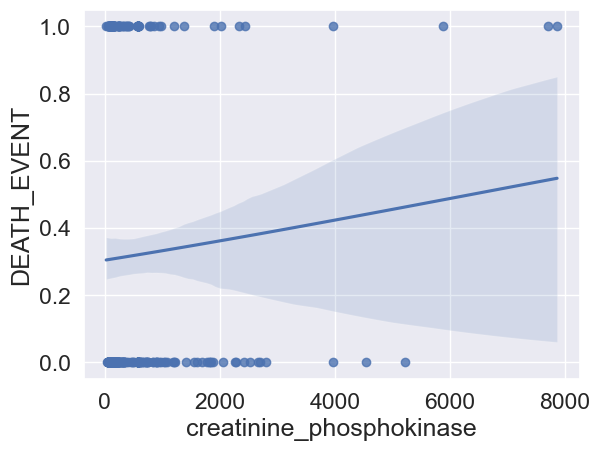

In [56]:
# Feel free to add any additional graphs that help you answer the questions below.
sns.regplot(data=df, x='creatinine_phosphokinase', y='DEATH_EVENT', logistic=True)

#### What things can you infer if we consider our data a sample of the population, based on each of your variables.  
<br>
High creatinine_phosphokinase can be associated with heart failure.
<br><br><br><br>
#### Do you think either of your variables is a good indicator for predicting Heart Failure, why or why not? 
<br>
Hard to tell and irresponsible to state without additional analysis. Best to run a chi-square test on smoking and heart failure.
<br><br><br><br>